## Week 2 Exercise

**Assignment**: This exercise will use a live, publicly accessable API to collect multiple categories of data in order to conduct analyses and create visulizations.  Spefically, you will:
  
* Collect data from a public website
* Read data into dataframes
* Develop a research question(s)
* Inform that research question with visualizations
* Inform that research question with basic statistics
* Provide a short write up of your analysis
* Generalize this analysis to "big data"

For this exercise, you will have to complete all the tasks within this notebook, save the entire notebook, and then upload into the Week 2 Assignment for your group on BlackBoard. Save this notebook with a new name with the following format:

**Week_2_Exercise_Group_group_number.ipynb**

These in-class exercises are designed to allow you to explore Python with your group and **DO NOT** include step-by-step directions or answers that have only one possibility. Use your team and other resources to determine how best to complete them. Make sure before you turn in your notebook that it runs without errors and the requested output is visible in the notebook. If you go through multiple steps in your code, make sure all those steps are included so that we can evaluate your work.

## Basketball Statistics

For this exercise, we are going to use the National Basketball Association's statitics site. We will be using a Python library called [requests](http://docs.python-requests.org/en/latest/) to send a URL to their http://stats.nba.com site to query it for player shot data. Requests makes it easy to do "web scaping" like this. The data returned from the website is JSON, but we will reading that JSON into a pandas dataframe for analysis.

In order to make the retreival of the data easier, we have written a function that will return the shot statistics for any player for the 2014-2015 season. You have already been using simple functions like <code>type</code> and <code>id</code>, but in this case we are writing our own. Once you run the code in the cell below, the function <code>get_shot_stats</code> will be available for you to use just as any other Python function. Our function has one input parameter which is the NBA's player id.

Run the code in the following block to make the function available for use in the notebook namespace.

In [27]:
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail/?CFID=33&CFPAR'\
                    'AMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&D'\
                    'ateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Loca'\
                    'tion=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&'\
                    'PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID={}&Plu'\
                    'sMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&Seas'\
                    'onSegment=&SeasonType=Regular+Season&TeamID=0&VsConferenc'\
                    'e=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&sh'\
                    'owZones=0'
                   
print shot_chart_url

http://stats.nba.com/stats/shotchartdetail/?CFID=33&CFPARAMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID={}&PlusMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&showZones=0


In [28]:
import requests
import pandas as pd

def get_shot_stats(player_id):
    """
    Return a dataframe of player shot statistics from the NBA API.
    
    Keyword arguments:
    player_id: the integer player id from http://stats.nba.com
    """

    shot_chart_url = 'http://stats.nba.com/player/#!/202688/stats/?Season=2014-15&SeasonType=Regular%20Season'                    
                    
    response = requests.get(shot_chart_url)
    headers = response.json()['resultSets'][0]['headers']
    shots = response.json()['resultSets'][0]['rowSet']
    shot_df = pd.DataFrame(shots, columns=headers)
    
    return shot_df

Now, let's use the function to collect data for Phoenix Sun's player Brandon Knight. We happen to know Brandon Knight's id number is 202688.

In [29]:
# Assign Brandon's id to a variable.
brandon = 202688

In [34]:
# Use our fucntion to get Brandon's stats and assign the returned dataframe to var.
brandon_shots = get_shot_stats(brandon)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [33]:
# Print the dataframe to make sure it worked.
print brandon_shots

NameError: name 'brandon_shots' is not defined

With larger dataframe like this, returning the columns attribute via <code>df.columns</code> is a convienent way to see the column names without printing the entire dataframe. 

Using your knowledge of data selection, indexing, boolean masks, and the dataframe function <code>.sum()</code>, print out the number of baskets Brandon made both playing for the Suns and the Bucks.

In [ ]:
# Print the number of baskets Brandon made as a Sun.
shots_made_Suns = brandon_shots[(brandon_shots.TEAM_NAME == 'Phoenix Suns') & (brandon_shots.SHOT_MADE_FLAG == 1)]
shots_made_Suns['SHOT_MADE_FLAG'].sum()


In [ ]:
# Print the number of baskets Brandon made as a Buck.
shots_made_Bucks = brandon_shots[(brandon_shots.TEAM_NAME == 'Milwaukee Bucks') & (brandon_shots.SHOT_MADE_FLAG == 1)]
shots_made_Bucks['SHOT_MADE_FLAG'].sum()

The pandas selection and statistics functions offer a powerful tool to explore datasets like the one we collected from the NBA. Let's give you one more tool before we continue- visualization.

In the next code block we are going to import a function that allows us to visualize Brandon's shots on a basketball court. Specifically, this function draws the court. When you are working with matplotlib plots in Python, you can think of each individual function as drawing a layer and the <code>draw_court</code> function will provide the court layer that you will plot on top of. Run the following code block to see that.

In [35]:
# Let's read in a helper function for drawing and set up plotting

import matplotlib.pyplot as plt
from draw_court import draw_court
# Thanks to Savvas Tjortjoglou for letting us use his code in our course!
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


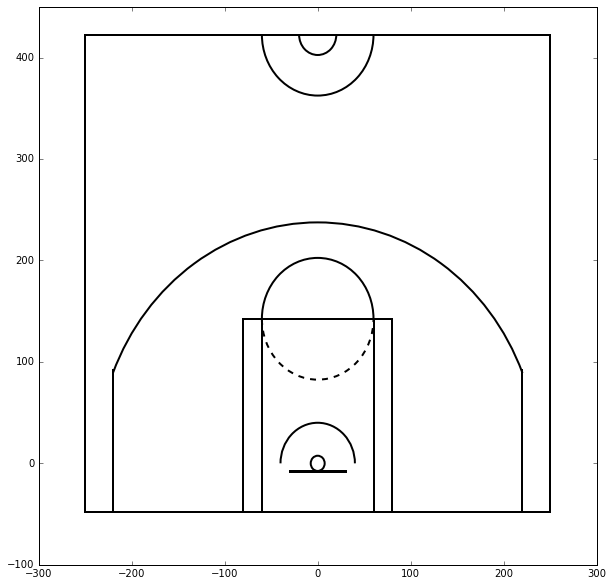

In [36]:
# Call the helper function to draw a court

plt.figure('court')# Begin plotting a figure called court.
draw_court(outer_lines=True)# Call the draw_court function.
plt.xlim(-300,300)# Set the limits of the canvas for the x axis.
plt.ylim(-100,450)# Set the limits of the canvas for the y axis
plt.show()# Display the figure.

While we will look in more detail at plotting in a future lab, we want to give you one more plotting tool, <code>plt.scatter()</code>.

The <code>plt.scatter()</code> allows you to create a scatter plot by passing in a matrix of x and y coordinates. Detailed documentation is here:

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

The code in the following code block is a simple example of this using random data.

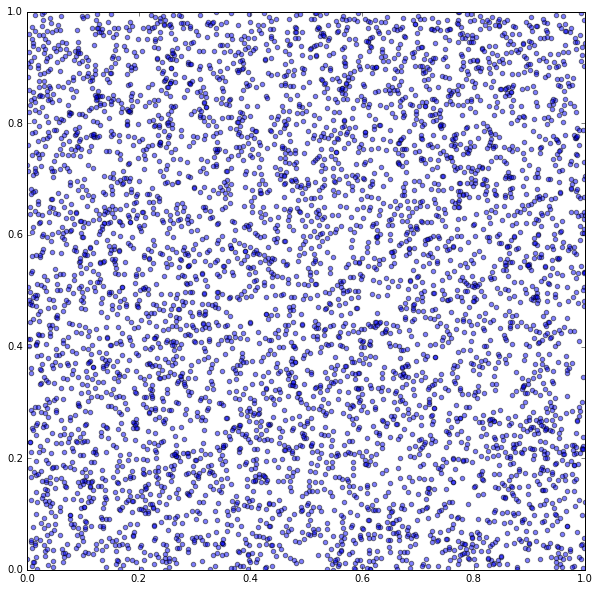

In [37]:
import numpy as np # Import NumPy to generate random numbers.

plt.figure('scatter')# Begin plotting a figure called scatter.
x = np.random.rand(5000)# Generate 5000 random points for the x axis.
y = np.random.rand(5000)# Generate a corresponding 5000 points for the y axis.
plt.xlim(0,1)# Set the limits of the canvas for the x axis.
plt.ylim(0,1)# Set the limits of the canvas for the y axis.
plt.scatter(x,y, alpha=.5)# Plot the points with alpha value to make semi-transparent.
plt.show()# Show the plot in the notebook.

In [38]:
plt.figure('scatter')
x = brandon_shots['LOC_X']# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
y = brandon_shots['LOC_Y']# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
plt.xlim(-300,300)
plt.ylim(-100,450)
draw_court(outer_lines=True)
plt.scatter(x,y, alpha=.5)
plt.show()

NameError: name 'brandon_shots' is not defined

Finally, if you want to generate dataframes for other players than Brandon, you can lookup player numbers at http://stats.nba.com/. Player numbers appear in the page query parameters as shown below:

<img src="https://raw.githubusercontent.com/azbones/big_data/master/images/brandon.png">

# Written Response 1:
_(Enter Your Response in This Cell)_

Develop and enter a research question in this markdown box that you can explore with the NBA data, dataframe functions, and plotting. Do not use Brandon Knight in this question.

Specically, use scatter plots to plot player shot selection on the pyplot court image. Try to make the research question more interesting by exploring something beyond just shot selection for a single player across the whole season across the whole game.

>>Using the statistics from the NBA, we want to examine James Harden's stats. Using this data we aim to calculate whether James Harden makes more 3PT FGs during the first or second half of the game.  Our approach is to try and determine if Harden is more accurate in the beginnig of a game (more energy/stamina/well rested) versus later in the game (more exhausted), or if he increased his accuracy later in the game, under the assumption that he feels the need to score more points (in order to win), which puts more pressure on him to make the shots.

>>Research Question: Does James Harden perform better with 3 pt FGs in the first or second half of a game?

>>Our graph/data will show on the court diagram 3 pt FGs during periods 1 and 2 vs periods 3 and 4.

In [2]:
# Write code to present visualizations that inform your research question. 
# Remember, plot the court, plot the shots, and then "show" the figure.

import requests
import pandas as pd

#Determine Harden's player number and retrieve the data from the NBA stats site
JAMES_PLAYER_ID = 201935
james_shots = get_shot_stats(JAMES_PLAYER_ID)

#print 'Total number of 2PT and 3PT field goal shots attempted and made by James Harden: {}'.format(james_shots['SHOT_ATTEMPTED_FLAG'].sum())

#plt.figure('scatter')
#plt.title('Location of Shots')
#x = james_shots['LOC_X']# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
#y = james_shots['LOC_Y']# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
#plt.xlim(-300,300)
#plt.ylim(-100,450)
#draw_court(outer_lines=True)
#plt.scatter(x,y, alpha=.5)
#plt.show()

NameError: name 'get_shot_stats' is not defined

In [41]:
print james_shots

NameError: name 'james_shots' is not defined

In [3]:
# Write code to generate some basic statistics (like sum() or average()) to inform your research question.

#Defining 3PT FG attempt, made, and missed variables during first half
james_3fg_attempt_first = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') &
                                      (james_shots.SHOT_ATTEMPTED_FLAG == 1) & 
                                      (james_shots.PERIOD == 1) |
                                      (james_shots.PERIOD == 2)]

james_3fg_made_first = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') &
                                   (james_shots.SHOT_MADE_FLAG == 1) &
                                   (james_shots.PERIOD == 1) |
                                   (james_shots.PERIOD == 2)]

james_3fg_missed_first = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') &
                                     (james_shots.SHOT_MADE_FLAG == 0) &
                                     (james_shots.PERIOD == 1) |
                                     (james_shots.PERIOD == 2)]

#Defining 3PT FG attempt, made, and missed variables during second half
james_3fg_attempt_second = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') &
                                      (james_shots.SHOT_ATTEMPTED_FLAG == 1) & 
                                      (james_shots.PERIOD == 3) |
                                      (james_shots.PERIOD == 4)]

james_3fg_made_second = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') &
                                   (james_shots.SHOT_MADE_FLAG == 1) &
                                   (james_shots.PERIOD == 3) |
                                   (james_shots.PERIOD == 4)]

james_3fg_missed_second = james_shots[(james_shots.SHOT_TYPE == '3PT Field Goal') &
                                     (james_shots.SHOT_MADE_FLAG == 0) &
                                     (james_shots.PERIOD == 3) |
                                     (james_shots.PERIOD == 4)]

#Calculating probability of made 3PT FGs during first half
james_3fg_probability_first = james_3fg_made_first['SHOT_MADE_FLAG'].count() / james_3fg_attempt_first['SHOT_MADE_FLAG'].count()
james_3fg_probability_second = james_3fg_made_second['SHOT_MADE_FLAG'].count() / james_3fg_attempt_second['SHOT_MADE_FLAG'].count()

#Printing shot attempts, made, and missed sums during first half
print 'Number of 3PT Field Goals Attempted During First Half: {}'.format(len(james_3fg_attempt_first.index))
print 'Number of 3PT Field Goals Made During First Half: {}'.format(len(james_3fg_made_first.index))
print 'Number of 3PT Field Goals Missed During First Half: {}'.format(len(james_3fg_missed_first.index))
print 'Probability of 3PT Field Goals Made During First Half: {}'.format(james_3fg_probability_first)

#Defining X,Y location of 3PT FG shot made and attempted during first half
x_attempt_first = james_3fg_attempt_first['LOC_X']
x_made_first = james_3fg_made_first['LOC_X']
y_attempt_first = james_3fg_attempt_first['LOC_Y']
y_made_first = james_3fg_made_first['LOC_Y']

#Plotting shots attempted and shots made during first half on court graph.
plt.figure('scatter')
plt.title('Location of Attempted and Made Shots for First Half')
xa1 = x_attempt_first# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
xm1 = x_made_first# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
ya1 = y_attempt_first# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
ym1 = y_made_first# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
plt.xlim(-300,300)
plt.ylim(-100,450)
draw_court(outer_lines=True)
plt.scatter(xa1,ya1, alpha=.2)
plt.scatter(xm1,ym1, color='red', alpha=.9, marker='x')
plt.show()

#Printing shot attempts, made, and missed sums during second half
print '\nNumber of 3PT Field Goals Attempted During Second Half: {}'.format(len(james_3fg_attempt_second.index))
print 'Number of 3PT Field Goals Made During Second Half: {}'.format(len(james_3fg_made_second.index))
print 'Number of 3PT Field Goals Missed During Second Half: {}'.format(len(james_3fg_missed_second.index))
print 'Probability of 3PT Field Goals Made During Second Half: {}'.format(james_3fg_probability_second)

#Defining X,Y location of 3PT FG shot made and attempted during second half
x_attempt_second = james_3fg_attempt_second['LOC_X']
x_made_second = james_3fg_made_second['LOC_X']
y_attempt_second = james_3fg_attempt_second['LOC_Y']
y_made_second = james_3fg_made_second['LOC_Y']

#Plotting shots attempted and shots made during second half on court graph.
plt.figure('scatter')
plt.title('Location of Attempted and Made Shots for Second Half')
xa2 = x_attempt_second# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
xm2 = x_made_second# make this just a column of the X shot locations from your datafrane above like dataframe['LOC_X']
ya2 = y_attempt_second# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
ym2 = y_made_second# make this just a column of the Y shot locations from your datafrane above like dataframe['LOC_Y']
plt.xlim(-300,300)
plt.ylim(-100,450)
draw_court(outer_lines=True)
plt.scatter(xa2,ya2, alpha=.2)
plt.scatter(xm2,ym2, color='red', alpha=.9, marker='D')
plt.show()

NameError: name 'james_shots' is not defined

## Written Response 2:
_(Enter Your Response in This Cell)_

Provide a short write up of what your analysis revealed.

Based on this approach, we found that 

## Written Response 3:
_(Enter Your Response in This Cell)_

* How might data available from public websites be part of a "big data" strategy?
Part of the concept of "big data" is that data is everywhere, from hundreds/thousands/millions of resources, and covering a broad range of information topics.  Furthermore, deeper within the concept of "big data" is that individual users (such as our group in this class) do not need to collect/gather, and then store all this data.  Instead, using a public website as part of the "big data" strategy, the information that may be useful to someone is easily and readily available, without the need for the data to be duplicated and re-housed in various locations by each user looking to extract information from the data.  This approach expands the idea of the Internet, whereby one resource (a webpage) is available to billions of people from a single source of data (the web server that the webpage resides upon).

* What might be some of the challenges of this approach?
Some of the challenges using public websites can included (but are not limited to) the following:
- Changes in the public source that cause references to break/links to no longer work
- Communication of changes in the data; on a public site, there is no "onus" upon which the data source must be sure to notify users of the data repository of any changes, or worse yet, complete removal of the data source.
- Guarantee of data integrity by the public source, especially if supplied by a public community site (such as Wikipedia) where most anyone could edit and potentially corrupt the data source

